# **Dog Breed Identification**

The first cell mounts a google drive repository into this instance after authentication. I authenticate this with my personal Google Drive, which has the image data, and it is then copied from the drive directory onto this instance in the second cell. 

We can directly access it from the drive folder after mounting as well, but that would slow down the learning process. Learning is faster when data is in the local instance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r '/content/drive/My Drive/data' '/content'

The cell below loads all the libraries used in this project.

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from matplotlib import image
import os
import csv
import cv2
from torch import nn
import torchvision.models as models
import numpy as np
import torch.nn.functional as F
from torchvision import transforms, utils
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report

The cell below creates the 3 different dataset classes that we use in this project, one each for Training, Validation, and Test.

In [ ]:
class DogsTrainDataset(Dataset):

    def __init__(self,  transform=None):
        labels=dict()
        with open('/content/data/labels.csv') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count > 0:
                    labels[row[0]] = row[1]
                line_count += 1
    

        train_path = "/content/data/train"

        file_list = os.listdir(train_path)
        self.data=[]
        for file_name in file_list:
            id = file_name[:(len(file_name)-4)]
            class_name = labels[id]
            self.data.append([train_path+'/'+file_name, class_name])
        self.class_map = {'golden_retriever': 0, 'soft-coated_wheaten_terrier': 1, 'siberian_husky': 2, 'bouvier_des_flandres': 3, 'papillon': 4, 'sealyham_terrier': 5, 'cocker_spaniel': 6, 'old_english_sheepdog': 7, 'great_pyrenees': 8, 'bloodhound': 9, 'miniature_schnauzer': 10, 'redbone': 11, 'samoyed': 12, 'bull_mastiff': 13, 'irish_setter': 14, 'border_collie': 15, 'vizsla': 16, 'norwich_terrier': 17, 'newfoundland': 18, 'dandie_dinmont': 19, 'komondor': 20, 'giant_schnauzer': 21, 'chesapeake_bay_retriever': 22, 'japanese_spaniel': 23, 'gordon_setter': 24, 'miniature_poodle': 25, 'standard_poodle': 26, 'norwegian_elkhound': 27, 'dhole': 28, 'clumber': 29, 'staffordshire_bullterrier': 30, 'pekinese': 31, 'pug': 32, 'cairn': 33, 'chihuahua': 34, 'chow': 35, 'weimaraner': 36, 'schipperke': 37, 'saluki': 38, 'afghan_hound': 39, 'entlebucher': 40, 'welsh_springer_spaniel': 41, 'norfolk_terrier': 42, 'english_springer': 43, 'mexican_hairless': 44, 'english_foxhound': 45, 'doberman': 46, 'borzoi': 47, 'airedale': 48, 'west_highland_white_terrier': 49, 'american_staffordshire_terrier': 50, 'miniature_pinscher': 51, 'eskimo_dog': 52, 'tibetan_terrier': 53, 'black-and-tan_coonhound': 54, 'walker_hound': 55, 'toy_terrier': 56, 'rottweiler': 57, 'whippet': 58, 'groenendael': 59, 'german_short-haired_pointer': 60, 'dingo': 61, 'african_hunting_dog': 62, 'affenpinscher': 63, 'collie': 64, 'wire-haired_fox_terrier': 65, 'basset': 66, 'shih-tzu': 67, 'beagle': 68, 'boxer': 69, 'silky_terrier': 70, 'basenji': 71, 'french_bulldog': 72, 'cardigan': 73, 'bernese_mountain_dog': 74, 'leonberg': 75, 'pomeranian': 76, 'bedlington_terrier': 77, 'australian_terrier': 78, 'rhodesian_ridgeback': 79, 'flat-coated_retriever': 80, 'otterhound': 81, 'italian_greyhound': 82, 'kerry_blue_terrier': 83, 'scottish_deerhound': 84, 'kuvasz': 85, 'saint_bernard': 86, 'sussex_spaniel': 87, 'ibizan_hound': 88, 'curly-coated_retriever': 89, 'brabancon_griffon': 90, 'irish_terrier': 91, 'kelpie': 92, 'toy_poodle': 93, 'malinois': 94, 'border_terrier': 95, 'irish_water_spaniel': 96, 'malamute': 97, 'irish_wolfhound': 98, 'labrador_retriever': 99, 'english_setter': 100, 'lakeland_terrier': 101, 'german_shepherd': 102, 'maltese_dog': 103, 'blenheim_spaniel': 104, 'yorkshire_terrier': 105, 'great_dane': 106, 'tibetan_mastiff': 107, 'standard_schnauzer': 108, 'greater_swiss_mountain_dog': 109, 'boston_bull': 110, 'shetland_sheepdog': 111, 'lhasa': 112, 'pembroke': 113, 'briard': 114, 'brittany_spaniel': 115, 'bluetick': 116, 'keeshond': 117, 'scotch_terrier': 118, 'appenzeller': 119}
        self.img_dim = (400, 400)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        if self.transform:
            img_tensor = self.transform(img)
        class_id = torch.tensor([class_id])
        return img_tensor.float(), class_id


class DogsValDataset(Dataset):

    def __init__(self,  transform=None):
        labels=dict()
        with open('/content/data/labels.csv') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count > 0:
                    labels[row[0]] = row[1]
                line_count += 1
    

        val_path = "/content/data/validation"

        file_list = os.listdir(val_path)
        self.data=[]
        for file_name in file_list:
            id = file_name[:(len(file_name)-4)]
            class_name = labels[id]
            self.data.append([val_path+'/'+file_name, class_name])
        self.class_map = {'golden_retriever': 0, 'soft-coated_wheaten_terrier': 1, 'siberian_husky': 2, 'bouvier_des_flandres': 3, 'papillon': 4, 'sealyham_terrier': 5, 'cocker_spaniel': 6, 'old_english_sheepdog': 7, 'great_pyrenees': 8, 'bloodhound': 9, 'miniature_schnauzer': 10, 'redbone': 11, 'samoyed': 12, 'bull_mastiff': 13, 'irish_setter': 14, 'border_collie': 15, 'vizsla': 16, 'norwich_terrier': 17, 'newfoundland': 18, 'dandie_dinmont': 19, 'komondor': 20, 'giant_schnauzer': 21, 'chesapeake_bay_retriever': 22, 'japanese_spaniel': 23, 'gordon_setter': 24, 'miniature_poodle': 25, 'standard_poodle': 26, 'norwegian_elkhound': 27, 'dhole': 28, 'clumber': 29, 'staffordshire_bullterrier': 30, 'pekinese': 31, 'pug': 32, 'cairn': 33, 'chihuahua': 34, 'chow': 35, 'weimaraner': 36, 'schipperke': 37, 'saluki': 38, 'afghan_hound': 39, 'entlebucher': 40, 'welsh_springer_spaniel': 41, 'norfolk_terrier': 42, 'english_springer': 43, 'mexican_hairless': 44, 'english_foxhound': 45, 'doberman': 46, 'borzoi': 47, 'airedale': 48, 'west_highland_white_terrier': 49, 'american_staffordshire_terrier': 50, 'miniature_pinscher': 51, 'eskimo_dog': 52, 'tibetan_terrier': 53, 'black-and-tan_coonhound': 54, 'walker_hound': 55, 'toy_terrier': 56, 'rottweiler': 57, 'whippet': 58, 'groenendael': 59, 'german_short-haired_pointer': 60, 'dingo': 61, 'african_hunting_dog': 62, 'affenpinscher': 63, 'collie': 64, 'wire-haired_fox_terrier': 65, 'basset': 66, 'shih-tzu': 67, 'beagle': 68, 'boxer': 69, 'silky_terrier': 70, 'basenji': 71, 'french_bulldog': 72, 'cardigan': 73, 'bernese_mountain_dog': 74, 'leonberg': 75, 'pomeranian': 76, 'bedlington_terrier': 77, 'australian_terrier': 78, 'rhodesian_ridgeback': 79, 'flat-coated_retriever': 80, 'otterhound': 81, 'italian_greyhound': 82, 'kerry_blue_terrier': 83, 'scottish_deerhound': 84, 'kuvasz': 85, 'saint_bernard': 86, 'sussex_spaniel': 87, 'ibizan_hound': 88, 'curly-coated_retriever': 89, 'brabancon_griffon': 90, 'irish_terrier': 91, 'kelpie': 92, 'toy_poodle': 93, 'malinois': 94, 'border_terrier': 95, 'irish_water_spaniel': 96, 'malamute': 97, 'irish_wolfhound': 98, 'labrador_retriever': 99, 'english_setter': 100, 'lakeland_terrier': 101, 'german_shepherd': 102, 'maltese_dog': 103, 'blenheim_spaniel': 104, 'yorkshire_terrier': 105, 'great_dane': 106, 'tibetan_mastiff': 107, 'standard_schnauzer': 108, 'greater_swiss_mountain_dog': 109, 'boston_bull': 110, 'shetland_sheepdog': 111, 'lhasa': 112, 'pembroke': 113, 'briard': 114, 'brittany_spaniel': 115, 'bluetick': 116, 'keeshond': 117, 'scotch_terrier': 118, 'appenzeller': 119}
        self.img_dim = (400, 400)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        if self.transform:
            img_tensor = self.transform(img)
        class_id = torch.tensor([class_id])
        return img_tensor.float(), class_id

class DogsTestDataset(Dataset):

    def __init__(self,  transform=None):
        labels=dict()
        with open('/content/data/labels.csv') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count > 0:
                    labels[row[0]] = row[1]
                line_count += 1
    

        test_path = "/content/data/test"

        file_list = os.listdir(test_path)
        self.data=[]
        for file_name in file_list:
            id = file_name[:(len(file_name)-4)]
            class_name = labels[id]
            self.data.append([test_path+'/'+file_name, class_name])
        self.class_map = {'golden_retriever': 0, 'soft-coated_wheaten_terrier': 1, 'siberian_husky': 2, 'bouvier_des_flandres': 3, 'papillon': 4, 'sealyham_terrier': 5, 'cocker_spaniel': 6, 'old_english_sheepdog': 7, 'great_pyrenees': 8, 'bloodhound': 9, 'miniature_schnauzer': 10, 'redbone': 11, 'samoyed': 12, 'bull_mastiff': 13, 'irish_setter': 14, 'border_collie': 15, 'vizsla': 16, 'norwich_terrier': 17, 'newfoundland': 18, 'dandie_dinmont': 19, 'komondor': 20, 'giant_schnauzer': 21, 'chesapeake_bay_retriever': 22, 'japanese_spaniel': 23, 'gordon_setter': 24, 'miniature_poodle': 25, 'standard_poodle': 26, 'norwegian_elkhound': 27, 'dhole': 28, 'clumber': 29, 'staffordshire_bullterrier': 30, 'pekinese': 31, 'pug': 32, 'cairn': 33, 'chihuahua': 34, 'chow': 35, 'weimaraner': 36, 'schipperke': 37, 'saluki': 38, 'afghan_hound': 39, 'entlebucher': 40, 'welsh_springer_spaniel': 41, 'norfolk_terrier': 42, 'english_springer': 43, 'mexican_hairless': 44, 'english_foxhound': 45, 'doberman': 46, 'borzoi': 47, 'airedale': 48, 'west_highland_white_terrier': 49, 'american_staffordshire_terrier': 50, 'miniature_pinscher': 51, 'eskimo_dog': 52, 'tibetan_terrier': 53, 'black-and-tan_coonhound': 54, 'walker_hound': 55, 'toy_terrier': 56, 'rottweiler': 57, 'whippet': 58, 'groenendael': 59, 'german_short-haired_pointer': 60, 'dingo': 61, 'african_hunting_dog': 62, 'affenpinscher': 63, 'collie': 64, 'wire-haired_fox_terrier': 65, 'basset': 66, 'shih-tzu': 67, 'beagle': 68, 'boxer': 69, 'silky_terrier': 70, 'basenji': 71, 'french_bulldog': 72, 'cardigan': 73, 'bernese_mountain_dog': 74, 'leonberg': 75, 'pomeranian': 76, 'bedlington_terrier': 77, 'australian_terrier': 78, 'rhodesian_ridgeback': 79, 'flat-coated_retriever': 80, 'otterhound': 81, 'italian_greyhound': 82, 'kerry_blue_terrier': 83, 'scottish_deerhound': 84, 'kuvasz': 85, 'saint_bernard': 86, 'sussex_spaniel': 87, 'ibizan_hound': 88, 'curly-coated_retriever': 89, 'brabancon_griffon': 90, 'irish_terrier': 91, 'kelpie': 92, 'toy_poodle': 93, 'malinois': 94, 'border_terrier': 95, 'irish_water_spaniel': 96, 'malamute': 97, 'irish_wolfhound': 98, 'labrador_retriever': 99, 'english_setter': 100, 'lakeland_terrier': 101, 'german_shepherd': 102, 'maltese_dog': 103, 'blenheim_spaniel': 104, 'yorkshire_terrier': 105, 'great_dane': 106, 'tibetan_mastiff': 107, 'standard_schnauzer': 108, 'greater_swiss_mountain_dog': 109, 'boston_bull': 110, 'shetland_sheepdog': 111, 'lhasa': 112, 'pembroke': 113, 'briard': 114, 'brittany_spaniel': 115, 'bluetick': 116, 'keeshond': 117, 'scotch_terrier': 118, 'appenzeller': 119}
        self.img_dim = (400, 400)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        if self.transform:
            img_tensor = self.transform(img)
        class_id = torch.tensor([class_id])
        return img_tensor.float(), class_id

The cell below creates instances of DataLoaders for the 3 datasets, then randomly dispays an image from the training dataset.

33
['/content/data/train/e33873fb8e4f52734ab6b584dd6ede0e.jpg', 'cairn']


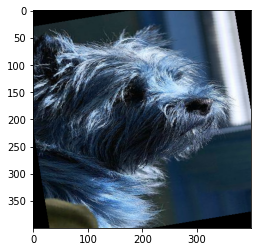

In [ ]:
train_dataset = DogsTrainDataset(transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.RandomRotation(15),
                                               transforms.ToTensor(),
                                           ]))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = DogsValDataset(transform=transforms.Compose([
                                               transforms.ToTensor(),
                                           ]))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = DogsTestDataset(transform=transforms.Compose([
                                               transforms.ToTensor(),
                                           ]))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle = False)

ind = random.randint(0, len(train_dataset.data))
image, label = train_dataset.__getitem__(ind)
plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
print(label.item())
print(train_dataset.data[ind])

device = 'cuda'

# **LeNet**

The cell below defines the modified version of the LeNet architecture that I used for training in my first experiment.

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__() 
        self.layer1 = nn.Sequential(nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2), 
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2), 
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), 
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2), 
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(nn.Linear(25*25*128, 1000),
                                    nn.ReLU(),
                                    nn.Dropout(p=0.5))
        self.layer6 = nn.Sequential(nn.Linear(1000, 500),
                                    nn.ReLU())                                    
        self.fc = nn.Linear(500, 120)
        self.drop = nn.Dropout(p=0.5)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1) 
        out = self.drop(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.fc(out)
        return out

Here we instantitate the model.

In [ ]:
model = Network()
if torch.cuda.is_available():
    model.cuda()

The cell below trains the LeNet model, and after every epoch also calculates the validation results to check progress.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.0005)
epochs = 60
graph_epochs=[]
graph_train_loss=[]
graph_train_accuracy=[]
graph_val_loss=[]
graph_val_accuracy=[]

for epoch in range(1, epochs + 1):
    model.train()
    train_losses = []
    i=0
    predictions = 0
    correct = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        loss = nn.CrossEntropyLoss()(out, labels)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += torch.sum(preds == labels).item()
        i +=1
        # Logging
    train_loss = torch.stack(train_losses).mean().item()
    train_acc = (correct / predictions) * 100

    model.eval()
    with torch.no_grad():
        predictions = 0
        correct = 0
        eval_losses = []
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            labels = labels.view(labels.size()[0])
            _, preds = torch.max(out, dim=1)
            predictions += len(preds)
            correct += (preds == labels).sum().item()
            loss = nn.CrossEntropyLoss()(out, labels)
            eval_losses.append(loss)
        eval_loss = torch.stack(eval_losses).mean().item()
        eval_acc = (correct / predictions) * 100
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy {:.4f} %, Val Loss: {:.4f}, Val Accuracy {:.4f} %'.format(epoch, epochs, train_loss, train_acc, eval_loss, eval_acc))
    graph_epochs.append(epoch)
    graph_train_loss.append(train_loss)
    graph_train_accuracy.append(train_acc)
    graph_val_loss.append(eval_loss)
    graph_val_accuracy.append(eval_acc)
print('Finished Training')


Epoch [1/60], Train Loss: 5.0024, Train Accuracy 1.1736 %, Val Loss: 4.7801, Val Accuracy 1.6153 %
Epoch [2/60], Train Loss: 4.7690, Train Accuracy 1.4507 %, Val Loss: 4.7544, Val Accuracy 1.5663 %
Epoch [3/60], Train Loss: 4.7451, Train Accuracy 1.4996 %, Val Loss: 4.7264, Val Accuracy 2.0069 %
Epoch [4/60], Train Loss: 4.7018, Train Accuracy 1.8745 %, Val Loss: 4.7201, Val Accuracy 0.7832 %
Epoch [5/60], Train Loss: 4.6628, Train Accuracy 2.0375 %, Val Loss: 4.6575, Val Accuracy 1.8600 %
Epoch [6/60], Train Loss: 4.6274, Train Accuracy 2.1190 %, Val Loss: 4.5857, Val Accuracy 2.5453 %
Epoch [7/60], Train Loss: 4.5771, Train Accuracy 2.4287 %, Val Loss: 4.5355, Val Accuracy 1.9579 %
Epoch [8/60], Train Loss: 4.5361, Train Accuracy 2.7547 %, Val Loss: 4.5176, Val Accuracy 2.2516 %
Epoch [9/60], Train Loss: 4.5007, Train Accuracy 3.2437 %, Val Loss: 4.4620, Val Accuracy 2.9858 %
Epoch [10/60], Train Loss: 4.4626, Train Accuracy 3.0644 %, Val Loss: 4.4321, Val Accuracy 3.2795 %
Epoch [11

The cell below runs the trained LeNet model on the test data.

In [ ]:
model.eval()
with torch.no_grad():
    predictions = 0
    correct = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += (preds == labels).sum().item()
        all_labels.extend(labels)
        all_preds.extend(preds)
    acc = (correct / predictions) * 100
    print('Accuracy of the model on the test set images: {} %'.format(acc))

Accuracy of the model on the test set images: 12.2858541360744 %


In the cells below, we save the weights, and print classification report and graphs for analysis.

In [ ]:
torch.save(model.state_dict(), './LeNet.pth')

In [ ]:
labels = [tensor.item() for tensor in all_labels]
preds = [tensor.item() for tensor in all_preds]
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.14      0.06      0.08        17
           1       0.20      0.14      0.17        14
           2       0.14      0.05      0.08        19
           3       0.14      0.20      0.16        15
           4       0.12      0.18      0.14        17
           5       0.50      0.10      0.17        20
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        22
           8       0.06      0.11      0.07        19
           9       0.00      0.00      0.00        12
          10       0.06      0.09      0.07        11
          11       0.00      0.00      0.00        14
          12       0.08      0.09      0.09        22
          13       0.00      0.00      0.00        13
          14       0.18      0.19      0.19        21
          15       0.21      0.30      0.25        20
          16       0.50      0.14      0.22        14
          17       0.06    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


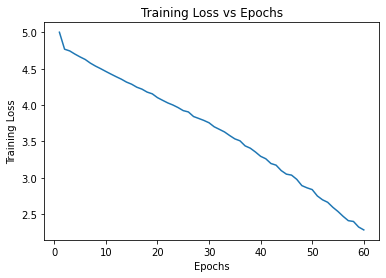

In [ ]:
plt.plot(graph_epochs, graph_train_loss)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.show()

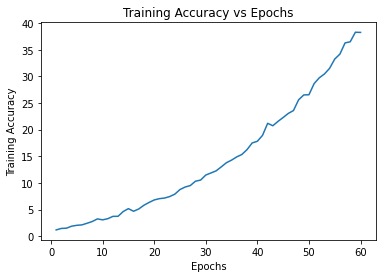

In [ ]:
plt.plot(graph_epochs, graph_train_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.show()

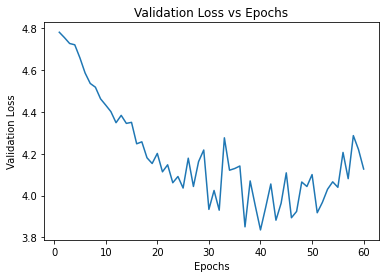

In [ ]:
plt.plot(graph_epochs, graph_val_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.show()

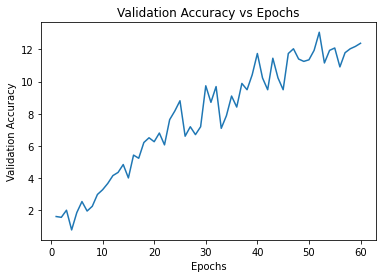

In [ ]:
plt.plot(graph_epochs, graph_val_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.show()

# **ResNet18**

The cell below instantiates the pre-trained ResNet18 model.

In [ ]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 120)
model = model.to(device)

The cell below trains the ResNet18 model, and after every epoch also calculates the validation results to check progress.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

epochs = 60
graph_epochs=[]
graph_train_loss=[]
graph_train_accuracy=[]
graph_val_loss=[]
graph_val_accuracy=[]

for epoch in range(1, epochs + 1):
    train_losses = []
    i=0
    predictions = 0
    correct = 0
    model.train()

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        loss = nn.CrossEntropyLoss()(out, labels)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += torch.sum(preds == labels).item()
        i +=1
        # Logging
    train_loss = torch.stack(train_losses).mean().item()
    train_acc = (correct / predictions) * 100

    model.eval()
    with torch.no_grad():
        predictions = 0
        correct = 0
        eval_losses = []
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            labels = labels.view(labels.size()[0])
            _, preds = torch.max(out, dim=1)
            predictions += len(preds)
            correct += (preds == labels).sum().item()
            loss = nn.CrossEntropyLoss()(out, labels)
            eval_losses.append(loss)
        eval_loss = torch.stack(eval_losses).mean().item()
        eval_acc = (correct / predictions) * 100
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy {:.4f} %, Val Loss: {:.4f}, Val Accuracy {:.4f} %'.format(epoch, epochs, train_loss, train_acc, eval_loss, eval_acc))
    graph_epochs.append(epoch)
    graph_train_loss.append(train_loss)
    graph_train_accuracy.append(train_acc)
    graph_val_loss.append(eval_loss)
    graph_val_accuracy.append(eval_acc)
print('Finished Training')

Epoch [1/60], Train Loss: 4.2824, Train Accuracy 9.9430 %, Val Loss: 3.4493, Val Accuracy 24.5717 %
Epoch [2/60], Train Loss: 2.9958, Train Accuracy 35.7294 %, Val Loss: 2.6227, Val Accuracy 40.7244 %
Epoch [3/60], Train Loss: 2.3165, Train Accuracy 49.9267 %, Val Loss: 2.2007, Val Accuracy 48.5071 %
Epoch [4/60], Train Loss: 1.9438, Train Accuracy 57.4735 %, Val Loss: 1.9943, Val Accuracy 50.7097 %
Epoch [5/60], Train Loss: 1.6735, Train Accuracy 62.0212 %, Val Loss: 1.8258, Val Accuracy 52.1292 %
Epoch [6/60], Train Loss: 1.4976, Train Accuracy 65.5257 %, Val Loss: 1.7186, Val Accuracy 54.0871 %
Epoch [7/60], Train Loss: 1.3605, Train Accuracy 68.5249 %, Val Loss: 1.6016, Val Accuracy 57.3177 %
Epoch [8/60], Train Loss: 1.2408, Train Accuracy 71.9315 %, Val Loss: 1.5676, Val Accuracy 57.0240 %
Epoch [9/60], Train Loss: 1.1636, Train Accuracy 72.2901 %, Val Loss: 1.5338, Val Accuracy 58.3456 %
Epoch [10/60], Train Loss: 1.0818, Train Accuracy 74.3276 %, Val Loss: 1.4818, Val Accuracy 

The cell below runs the trained ResNet18 model on the test data.

In [ ]:
model.eval()
with torch.no_grad():
    predictions = 0
    correct = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += (preds == labels).sum().item()
        all_labels.extend(labels)
        all_preds.extend(preds)
    acc = (correct / predictions) * 100
    print('Accuracy of the model on the test set images: {} %'.format(acc))

Accuracy of the model on the test set images: 60.15663240332844 %


In the cells below, we save the weights, and print classification report and graphs for analysis.

In [ ]:
save_path = './ResNet18.pth'
torch.save(model.state_dict(), save_path)

In [ ]:
labels = [tensor.item() for tensor in all_labels]
preds = [tensor.item() for tensor in all_preds]
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.40      0.43      0.41        14
           2       0.24      0.32      0.27        19
           3       0.46      0.40      0.43        15
           4       0.88      0.82      0.85        17
           5       0.81      0.65      0.72        20
           6       0.58      0.70      0.64        10
           7       0.87      0.59      0.70        22
           8       0.68      0.68      0.68        19
           9       0.67      0.67      0.67        12
          10       0.60      0.82      0.69        11
          11       0.18      0.36      0.24        14
          12       0.94      0.77      0.85        22
          13       0.82      0.69      0.75        13
          14       0.90      0.43      0.58        21
          15       0.59      0.65      0.62        20
          16       1.00      0.21      0.35        14
          17       0.42    

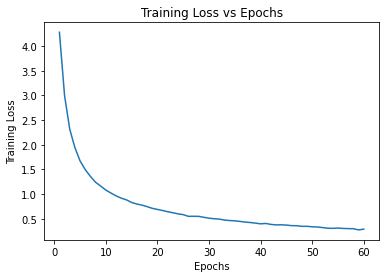

In [ ]:
plt.plot(graph_epochs, graph_train_loss)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.show()

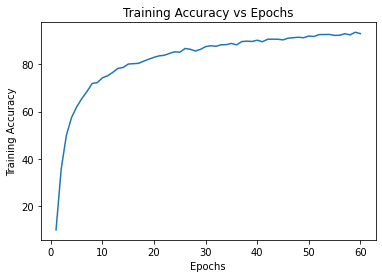

In [ ]:
plt.plot(graph_epochs, graph_train_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.show()

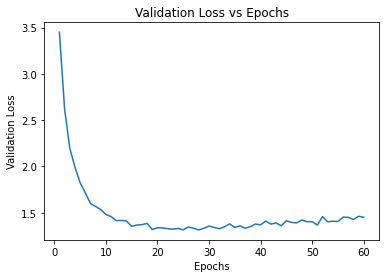

In [ ]:
plt.plot(graph_epochs, graph_val_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.show()

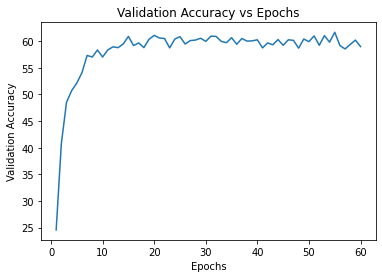

In [ ]:
plt.plot(graph_epochs, graph_val_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.show()

# **DenseNet161**

The cell below instantiates the pre-trained DenseNet161 model.

In [ ]:
model = models.densenet161(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 120)
model = model.to(device)


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

The cell below trains the DenseNet161 model, and after every epoch also calculates the validation results to check progress.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

epochs = 60
graph_epochs=[]
graph_train_loss=[]
graph_train_accuracy=[]
graph_val_loss=[]
graph_val_accuracy=[]

for epoch in range(1, epochs + 1):
    train_losses = []
    i=0
    predictions = 0
    correct = 0
    model.train()

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        loss = nn.CrossEntropyLoss()(out, labels)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += torch.sum(preds == labels).item()
        i +=1
        # Logging
    train_loss = torch.stack(train_losses).mean().item()
    train_acc = (correct / predictions) * 100

    model.eval()
    with torch.no_grad():
        predictions = 0
        correct = 0
        eval_losses = []
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            labels = labels.view(labels.size()[0])
            _, preds = torch.max(out, dim=1)
            predictions += len(preds)
            correct += (preds == labels).sum().item()
            loss = nn.CrossEntropyLoss()(out, labels)
            eval_losses.append(loss)
        eval_loss = torch.stack(eval_losses).mean().item()
        eval_acc = (correct / predictions) * 100
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy {:.4f} %, Val Loss: {:.4f}, Val Accuracy {:.4f} %'.format(epoch, epochs, train_loss, train_acc, eval_loss, eval_acc))
    graph_epochs.append(epoch)
    graph_train_loss.append(train_loss)
    graph_train_accuracy.append(train_acc)
    graph_val_loss.append(eval_loss)
    graph_val_accuracy.append(eval_acc)
print('Finished Training')

Epoch [1/60], Train Loss: 3.6121, Train Accuracy 24.7922 %, Val Loss: 2.4405, Val Accuracy 48.8497 %
Epoch [2/60], Train Loss: 1.7920, Train Accuracy 65.4442 %, Val Loss: 1.5951, Val Accuracy 63.9256 %
Epoch [3/60], Train Loss: 1.1753, Train Accuracy 76.7726 %, Val Loss: 1.2733, Val Accuracy 68.7225 %
Epoch [4/60], Train Loss: 0.8782, Train Accuracy 82.6406 %, Val Loss: 1.1231, Val Accuracy 70.6314 %
Epoch [5/60], Train Loss: 0.7149, Train Accuracy 85.5257 %, Val Loss: 1.0310, Val Accuracy 72.3935 %
Epoch [6/60], Train Loss: 0.6000, Train Accuracy 87.8892 %, Val Loss: 0.9370, Val Accuracy 75.3304 %
Epoch [7/60], Train Loss: 0.5073, Train Accuracy 90.0244 %, Val Loss: 0.9276, Val Accuracy 73.1767 %
Epoch [8/60], Train Loss: 0.4418, Train Accuracy 91.5566 %, Val Loss: 0.8600, Val Accuracy 75.0857 %
Epoch [9/60], Train Loss: 0.3937, Train Accuracy 93.0888 %, Val Loss: 0.8361, Val Accuracy 76.4562 %
Epoch [10/60], Train Loss: 0.3456, Train Accuracy 93.5615 %, Val Loss: 0.8302, Val Accuracy

The cell below runs the trained DenseNet161 model on the test data.

In [ ]:
model.eval()
with torch.no_grad():
    predictions = 0
    correct = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += (preds == labels).sum().item()
        all_labels.extend(labels)
        all_preds.extend(preds)
    acc = (correct / predictions) * 100
    print('Accuracy of the model on the test set images: {} %'.format(acc))

Accuracy of the model on the test set images: 75.8198727361723 %


In the cells below, we save the weights, and print classification report and graphs for analysis.

In [ ]:
save_path = './DenseNet161.pth'
torch.save(model.state_dict(), save_path)

In [ ]:
labels = [tensor.item() for tensor in all_labels]
preds = [tensor.item() for tensor in all_preds]
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70        17
           1       0.82      0.64      0.72        14
           2       0.45      0.26      0.33        19
           3       0.83      1.00      0.91        15
           4       0.91      0.59      0.71        17
           5       0.80      0.80      0.80        20
           6       0.80      0.80      0.80        10
           7       0.89      0.73      0.80        22
           8       0.79      0.79      0.79        19
           9       0.85      0.92      0.88        12
          10       0.71      0.91      0.80        11
          11       0.41      0.86      0.56        14
          12       0.95      0.82      0.88        22
          13       1.00      0.69      0.82        13
          14       0.91      1.00      0.95        21
          15       0.59      0.65      0.62        20
          16       0.88      0.50      0.64        14
          17       0.68    

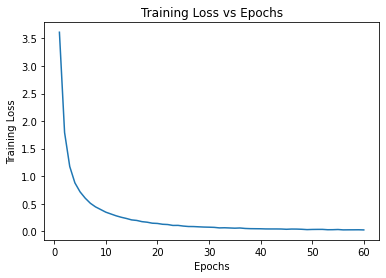

In [ ]:
plt.plot(graph_epochs, graph_train_loss)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.show()

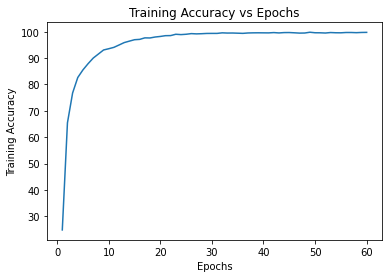

In [ ]:
plt.plot(graph_epochs, graph_train_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.show()

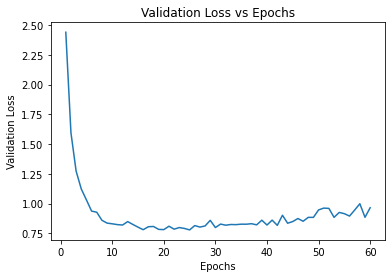

In [ ]:
plt.plot(graph_epochs, graph_val_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.show()

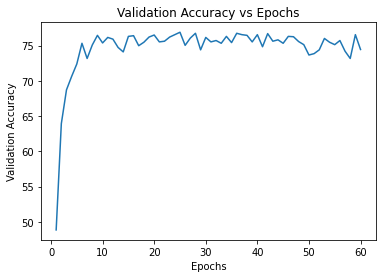

In [ ]:
plt.plot(graph_epochs, graph_val_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.show()

# **EfficientNetB7**

The cell below instantiates the pre-trained EfficientNetB7 model.

In [ ]:
model = models.efficientnet_b7(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Dropout(p=0.5, inplace=True),
                                 nn.Linear(2560, 120, bias=True))
model = model.to(device)

The cell below trains the EfficientNetB7 model, and after every epoch also calculates the validation results to check progress.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

epochs = 20
graph_epochs=[]
graph_train_loss=[]
graph_train_accuracy=[]
graph_val_loss=[]
graph_val_accuracy=[]

for epoch in range(1, epochs + 1):
    train_losses = []
    i=0
    predictions = 0
    correct = 0
    model.train()

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        loss = nn.CrossEntropyLoss()(out, labels)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += torch.sum(preds == labels).item()
        i +=1
        # Logging
    train_loss = torch.stack(train_losses).mean().item()
    train_acc = (correct / predictions) * 100

    model.eval()
    with torch.no_grad():
        predictions = 0
        correct = 0
        eval_losses = []
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            labels = labels.view(labels.size()[0])
            _, preds = torch.max(out, dim=1)
            predictions += len(preds)
            correct += (preds == labels).sum().item()
            loss = nn.CrossEntropyLoss()(out, labels)
            eval_losses.append(loss)
        eval_loss = torch.stack(eval_losses).mean().item()
        eval_acc = (correct / predictions) * 100
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Train Accuracy {:.4f} %, Val Loss: {:.4f}, Val Accuracy {:.4f} %'.format(epoch, epochs, train_loss, train_acc, eval_loss, eval_acc))
    graph_epochs.append(epoch)
    graph_train_loss.append(train_loss)
    graph_train_accuracy.append(train_acc)
    graph_val_loss.append(eval_loss)
    graph_val_accuracy.append(eval_acc)
print('Finished Training')

Epoch [1/20], Train Loss: 3.2034, Train Accuracy 45.6398 %, Val Loss: 1.7555, Val Accuracy 73.0788 %
Epoch [2/20], Train Loss: 1.5865, Train Accuracy 70.8883 %, Val Loss: 1.1224, Val Accuracy 77.6309 %
Epoch [3/20], Train Loss: 1.1538, Train Accuracy 76.7400 %, Val Loss: 0.9334, Val Accuracy 78.6099 %
Epoch [4/20], Train Loss: 0.9396, Train Accuracy 80.2282 %, Val Loss: 0.8497, Val Accuracy 79.3930 %
Epoch [5/20], Train Loss: 0.8350, Train Accuracy 81.5974 %, Val Loss: 0.7905, Val Accuracy 80.0783 %
Epoch [6/20], Train Loss: 0.7371, Train Accuracy 83.4393 %, Val Loss: 0.7577, Val Accuracy 79.4420 %
Epoch [7/20], Train Loss: 0.6588, Train Accuracy 84.9715 %, Val Loss: 0.7425, Val Accuracy 79.3930 %
Epoch [8/20], Train Loss: 0.6062, Train Accuracy 86.0799 %, Val Loss: 0.7326, Val Accuracy 79.5888 %
Epoch [9/20], Train Loss: 0.5630, Train Accuracy 87.1883 %, Val Loss: 0.7179, Val Accuracy 79.8336 %
Epoch [10/20], Train Loss: 0.5273, Train Accuracy 87.8077 %, Val Loss: 0.7086, Val Accuracy

The cell below runs the trained EfficientNetB7 model on the test data.

In [ ]:
model.eval()
with torch.no_grad():
    predictions = 0
    correct = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        labels = labels.view(labels.size()[0])
        _, preds = torch.max(out, dim=1)
        predictions += len(preds)
        correct += (preds == labels).sum().item()
        all_labels.extend(labels)
        all_preds.extend(preds)
    acc = (correct / predictions) * 100
    print('Accuracy of the model on the test set images: {} %'.format(acc))

Accuracy of the model on the test set images: 80.07831620166422 %


In the cells below, we save the weights, and print classification report and graphs for analysis.

In [ ]:
save_path = './EfficientNetB7.pth'
torch.save(model.state_dict(), save_path)

In [ ]:
labels = [tensor.item() for tensor in all_labels]
preds = [tensor.item() for tensor in all_preds]
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.85      0.79      0.81        14
           2       0.50      0.42      0.46        19
           3       0.63      0.80      0.71        15
           4       0.94      1.00      0.97        17
           5       0.79      0.75      0.77        20
           6       0.90      0.90      0.90        10
           7       1.00      0.82      0.90        22
           8       0.88      0.79      0.83        19
           9       0.73      0.92      0.81        12
          10       0.57      0.73      0.64        11
          11       0.53      0.64      0.58        14
          12       0.92      1.00      0.96        22
          13       0.75      0.92      0.83        13
          14       0.88      0.71      0.79        21
          15       0.81      0.65      0.72        20
          16       0.67      0.57      0.62        14
          17       0.79    

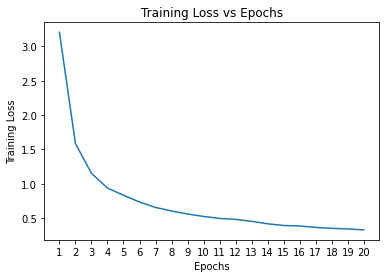

In [ ]:
plt.plot(graph_epochs, graph_train_loss)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.xticks(range(1,21))
plt.show()

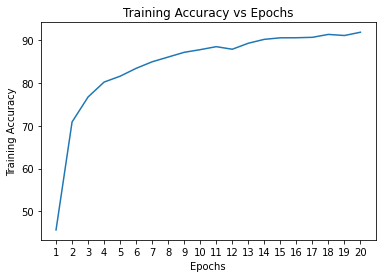

In [ ]:
plt.plot(graph_epochs, graph_train_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.xticks(range(1,21))
plt.show()

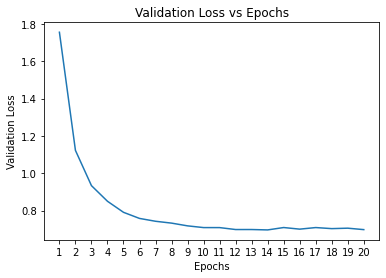

In [ ]:
plt.plot(graph_epochs, graph_val_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.xticks(range(1,21))
plt.show()

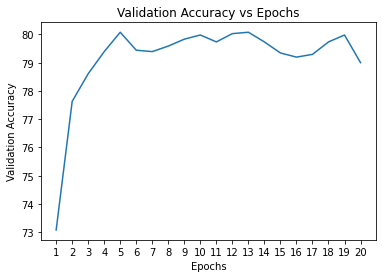

In [ ]:
plt.plot(graph_epochs, graph_val_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.xticks(range(1,21))
plt.show()

## **Prediction on uploaded image**

The cell below loads and displays the image.

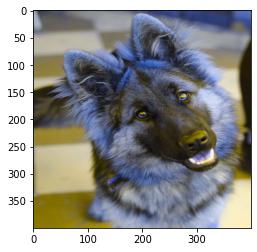

In [18]:
image_path = "sample.jpeg"
img = cv2.imread(image_path)
img = cv2.resize(img, (400, 400))

transform = transforms.Compose([transforms.ToTensor(),
                            ])

img = transform(img)

plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))

img = torch.unsqueeze(img, 0)

The cell below loads the trained weights into the model for predicting on a single image.

In [10]:
device='cuda'

weights_path = "./EfficientNetB7_Final.pth"
model = models.efficientnet_b7()

model.classifier = nn.Sequential(nn.Dropout(p=0.5, inplace=True),
                                 nn.Linear(2560, 120, bias=True))
model.load_state_dict(torch.load("./EfficientNetB7_Final.pth"))
model = model.to(device)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivatio

The cell below defines a function to get breed name class from index.

In [11]:
def get_class_name(index):
  class_map = {'golden_retriever': 0, 'soft-coated_wheaten_terrier': 1, 'siberian_husky': 2, 'bouvier_des_flandres': 3, 'papillon': 4, 'sealyham_terrier': 5, 'cocker_spaniel': 6, 'old_english_sheepdog': 7, 'great_pyrenees': 8, 'bloodhound': 9, 'miniature_schnauzer': 10, 'redbone': 11, 'samoyed': 12, 'bull_mastiff': 13, 'irish_setter': 14, 'border_collie': 15, 'vizsla': 16, 'norwich_terrier': 17, 'newfoundland': 18, 'dandie_dinmont': 19, 'komondor': 20, 'giant_schnauzer': 21, 'chesapeake_bay_retriever': 22, 'japanese_spaniel': 23, 'gordon_setter': 24, 'miniature_poodle': 25, 'standard_poodle': 26, 'norwegian_elkhound': 27, 'dhole': 28, 'clumber': 29, 'staffordshire_bullterrier': 30, 'pekinese': 31, 'pug': 32, 'cairn': 33, 'chihuahua': 34, 'chow': 35, 'weimaraner': 36, 'schipperke': 37, 'saluki': 38, 'afghan_hound': 39, 'entlebucher': 40, 'welsh_springer_spaniel': 41, 'norfolk_terrier': 42, 'english_springer': 43, 'mexican_hairless': 44, 'english_foxhound': 45, 'doberman': 46, 'borzoi': 47, 'airedale': 48, 'west_highland_white_terrier': 49, 'american_staffordshire_terrier': 50, 'miniature_pinscher': 51, 'eskimo_dog': 52, 'tibetan_terrier': 53, 'black-and-tan_coonhound': 54, 'walker_hound': 55, 'toy_terrier': 56, 'rottweiler': 57, 'whippet': 58, 'groenendael': 59, 'german_short-haired_pointer': 60, 'dingo': 61, 'african_hunting_dog': 62, 'affenpinscher': 63, 'collie': 64, 'wire-haired_fox_terrier': 65, 'basset': 66, 'shih-tzu': 67, 'beagle': 68, 'boxer': 69, 'silky_terrier': 70, 'basenji': 71, 'french_bulldog': 72, 'cardigan': 73, 'bernese_mountain_dog': 74, 'leonberg': 75, 'pomeranian': 76, 'bedlington_terrier': 77, 'australian_terrier': 78, 'rhodesian_ridgeback': 79, 'flat-coated_retriever': 80, 'otterhound': 81, 'italian_greyhound': 82, 'kerry_blue_terrier': 83, 'scottish_deerhound': 84, 'kuvasz': 85, 'saint_bernard': 86, 'sussex_spaniel': 87, 'ibizan_hound': 88, 'curly-coated_retriever': 89, 'brabancon_griffon': 90, 'irish_terrier': 91, 'kelpie': 92, 'toy_poodle': 93, 'malinois': 94, 'border_terrier': 95, 'irish_water_spaniel': 96, 'malamute': 97, 'irish_wolfhound': 98, 'labrador_retriever': 99, 'english_setter': 100, 'lakeland_terrier': 101, 'german_shepherd': 102, 'maltese_dog': 103, 'blenheim_spaniel': 104, 'yorkshire_terrier': 105, 'great_dane': 106, 'tibetan_mastiff': 107, 'standard_schnauzer': 108, 'greater_swiss_mountain_dog': 109, 'boston_bull': 110, 'shetland_sheepdog': 111, 'lhasa': 112, 'pembroke': 113, 'briard': 114, 'brittany_spaniel': 115, 'bluetick': 116, 'keeshond': 117, 'scotch_terrier': 118, 'appenzeller': 119}
  class_name="no match"
  for item in class_map.items():
    ind = item[1]
    if ind == index:
      class_name=item[0]
      break
  return class_name

The cell below runs the trained model on the image and then prints the predicted breed name.

In [19]:
img = img.to(device)
out = model(img)
_, preds = torch.max(out, dim=1)
class_name = get_class_name(preds[0].item())
words = class_name.split('_')
ans = ""
for word in words:
  word = word.capitalize()
  ans += word
  ans += " "
ans = ans.strip()
print("Prediction made by the model is - " + ans)


Prediction made by the model is - German Shepherd
